## 範例重點
* 了解如何 reset Tensorflow Graph
* 學習如何以迴圈方式訓練不同超參數的模型
* 學習如何以迴圈方式繪圖

In [1]:
import os
import keras

# 本範例不需使用 GPU, 將 GPU 設定為 "無"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [ ]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [ ]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [7]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 73us/step - loss: 1.8244 - acc: 0.3500 - val_loss: 1.6857 - val_acc: 0.3896
Epoch 2/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.5986 - acc: 0.4311 - val_loss: 1.7014 - val_acc: 0.3896
Epoch 3/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.5133 - acc: 0.4603 - val_loss: 1.6908 - val_acc: 0.4137
Epoch 4/50
50000/50000 [==============================] - 3s 66us/step - loss: 1.4513 - acc: 0.4843 - val_loss: 1.5131 - val_acc: 0.4594
Epoch 5/50
50000/50000 [==============================] - 3s 67us/step - loss: 1.4073 - acc: 0.4999 - val_loss: 1.4361 - val_acc: 0.4917
Epoch 6/50
50000/50000 [==============================] - 3s 67us/step - loss: 1.3594 - acc: 0.5173 - val_loss: 1.4957 - val_acc: 0.4621
Epoch 7/50
50000/50000 [==============================] - 4s 71us/step - loss: 1.3271 - acc: 0.5273 - val_loss: 1.4425 - val_acc

50000/50000 [==============================] - 3s 65us/step - loss: 1.8284 - acc: 0.3547 - val_loss: 1.7773 - val_acc: 0.3742
Epoch 3/50
50000/50000 [==============================] - 3s 67us/step - loss: 1.7395 - acc: 0.3891 - val_loss: 1.7018 - val_acc: 0.4005
Epoch 4/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.6775 - acc: 0.4103 - val_loss: 1.6507 - val_acc: 0.4219
Epoch 5/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.6286 - acc: 0.4284 - val_loss: 1.6164 - val_acc: 0.4248
Epoch 6/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.5896 - acc: 0.4418 - val_loss: 1.5737 - val_acc: 0.4466
Epoch 7/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.5521 - acc: 0.4563 - val_loss: 1.5443 - val_acc: 0.4540
Epoch 8/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.5194 - acc: 0.4670 - val_loss: 1.5208 - val_acc: 0.4633
Epoch 9/50
50000/50000 [============================

50000/50000 [==============================] - 3s 68us/step - loss: 2.0385 - acc: 0.2894 - val_loss: 2.0078 - val_acc: 0.3000
Epoch 4/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.9806 - acc: 0.3068 - val_loss: 1.9606 - val_acc: 0.3145
Epoch 5/50
50000/50000 [==============================] - 3s 67us/step - loss: 1.9396 - acc: 0.3217 - val_loss: 1.9253 - val_acc: 0.3285
Epoch 6/50
50000/50000 [==============================] - 3s 66us/step - loss: 1.9084 - acc: 0.3332 - val_loss: 1.8983 - val_acc: 0.3420
Epoch 7/50
50000/50000 [==============================] - 3s 66us/step - loss: 1.8843 - acc: 0.3413 - val_loss: 1.8763 - val_acc: 0.3457
Epoch 8/50
50000/50000 [==============================] - 3s 67us/step - loss: 1.8636 - acc: 0.3496 - val_loss: 1.8572 - val_acc: 0.3516
Epoch 9/50
50000/50000 [==============================] - 3s 66us/step - loss: 1.8460 - acc: 0.3568 - val_loss: 1.8402 - val_acc: 0.3559
Epoch 10/50
50000/50000 [===========================

Epoch 5/50
50000/50000 [==============================] - 3s 69us/step - loss: 2.2327 - acc: 0.1899 - val_loss: 2.2240 - val_acc: 0.2017
Epoch 6/50
50000/50000 [==============================] - 3s 64us/step - loss: 2.2175 - acc: 0.2028 - val_loss: 2.2094 - val_acc: 0.2124
Epoch 7/50
50000/50000 [==============================] - 3s 68us/step - loss: 2.2035 - acc: 0.2136 - val_loss: 2.1959 - val_acc: 0.2222
Epoch 8/50
50000/50000 [==============================] - 3s 66us/step - loss: 2.1903 - acc: 0.2219 - val_loss: 2.1831 - val_acc: 0.2280
Epoch 9/50
50000/50000 [==============================] - 3s 66us/step - loss: 2.1778 - acc: 0.2274 - val_loss: 2.1710 - val_acc: 0.2321
Epoch 10/50
50000/50000 [==============================] - 3s 66us/step - loss: 2.1660 - acc: 0.2322 - val_loss: 2.1595 - val_acc: 0.2350
Epoch 11/50
50000/50000 [==============================] - 3s 66us/step - loss: 2.1547 - acc: 0.2384 - val_loss: 2.1484 - val_acc: 0.2389
Epoch 12/50
50000/50000 [==============

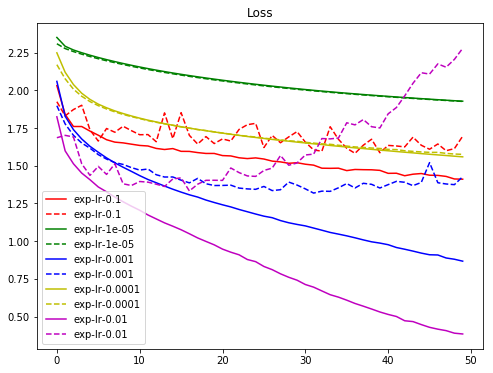

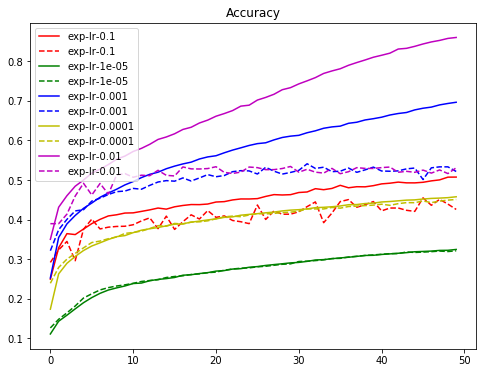

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現